# Part I - Ford GoBike System Data Exploration
## by Remi Dongmo

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for 2019.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df_raw = pd.read_csv('201902-fordgobike-tripdata.csv')
df_raw.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df_raw.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.00,183215.00,183412.00,183412.00,183215.00,183412.00,183412.00,183412.00,175147.00
mean,726.08,138.59,37.77,-122.35,136.25,37.77,-122.35,4472.91,1984.81
std,1794.39,111.78,0.10,0.12,111.52,0.10,0.12,1664.38,10.12
min,61.00,3.00,37.32,-122.45,3.00,37.32,-122.45,11.00,1878.00
25%,325.00,47.00,37.77,-122.41,44.00,37.77,-122.41,3777.00,1980.00
50%,514.00,104.00,37.78,-122.40,100.00,37.78,-122.40,4958.00,1987.00
75%,796.00,239.00,37.80,-122.29,235.00,37.80,-122.29,5502.00,1992.00
max,85444.00,398.00,37.88,-121.87,398.00,37.88,-121.87,6645.00,2001.00


> Basically, the dataset consists of 16 variables and 184,412 entries. Some variables don't have appropriate data types, others are missing and they are some who could be engineered into new more easily usable variables

In [6]:
df = df_raw.copy()

In [7]:
# Replacing birth years with ages

year_of_records = 2019  # The data in the dataset is from 2019
df['age'] = year_of_records - df.member_birth_year
df.drop(columns=['member_birth_year'], inplace=True)

In [8]:
''' Adding some useful additional variables'''

df['time_of_day'] = pd.DatetimeIndex(df.start_time).hour # Time of the day added
df['week_day'] = pd.DatetimeIndex(df.start_time).day_name(locale='English') # Day of the week added

df.loc[df.time_of_day == 0, 'time_of_day'] = 24 # Replacing 0hrs (midnight) with 24hrs

In [9]:
''' Giving variables more appropriate datatypes '''

# Converting timestamps to datetime type
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# Converting some important columns to categorical datatype
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')
df.user_type = df.user_type.astype('category')

# Converting id columns to Sttring instead of float or int
df.bike_id = df.bike_id.astype('str')
df.start_station_id = df.start_station_id.astype('str')
df.end_station_id = df.end_station_id.astype('str')

# Converting newly created float ages to int
df.age = df.age.dropna().apply(np.int64)

In [10]:
# Converting durations in minutes

df['duration_min'] = (df.duration_sec/60).astype(np.int64)
df.drop(columns=['duration_sec'], inplace=True)

In [11]:
# Assessing some missing variables
print("Number of missing ages:", len(df[df.age.isna()]))
print("Number of missing genders:", len(df[df.age.isna()]))

print("Are they involving the same rows?", set(df[df.member_gender.isna()].index == df[df.age.isna()].index))

#Dropping rows missing both age and gender
df = df[df.age.notna()]

#Testing
print("\n After fix")
print("Number of missing ages:", len(df[df.age.isna()]))
print("Number of missing genders:", len(df[df.age.isna()]))

Number of missing ages: 8265
Number of missing genders: 8265
Are they involving the same rows? {True}

 After fix
Number of missing ages: 0
Number of missing genders: 0


In [12]:
''' Replacing GPS Coords between stations with distance '''

import math

#Function to compute the distance
def get_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return round(d*1000)

        
df['distance_in_meter'] = df.apply(lambda i: get_distance((i['start_station_latitude'], i['start_station_longitude']),(i['end_station_latitude'], i['end_station_longitude'])), axis=1)


df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], inplace=True)

Got the hint from stackoverflow: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [13]:
df.shape

(175147, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               175147 non-null  datetime64[ns]
 1   end_time                 175147 non-null  datetime64[ns]
 2   start_station_id         175147 non-null  object        
 3   start_station_name       174952 non-null  object        
 4   end_station_id           175147 non-null  object        
 5   end_station_name         174952 non-null  object        
 6   bike_id                  175147 non-null  object        
 7   user_type                175147 non-null  category      
 8   member_gender            175147 non-null  category      
 9   bike_share_for_all_trip  175147 non-null  category      
 10  age                      175147 non-null  float64       
 11  time_of_day              175147 non-null  int64         
 12  week_day        

In [15]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,age,time_of_day,duration_min,distance_in_meter
count,175147.00,175147.00,175147.00,175147.00
mean,34.19,13.58,11.24,1689.33
std,10.12,4.69,27.36,1096.94
min,18.00,1.00,1.00,0.00
25%,27.00,9.00,5.00,908.00
50%,32.00,14.00,8.00,1429.00
75%,39.00,17.00,13.00,2222.00
max,141.00,24.00,1409.00,69469.00


- Average trip duration is 11 minutes
- Average distance is 1689 meters or 1,7km
- Average age is 34
- Minimum age being 18 and maximum age is 141 (strange)
- Most trips are during daytime

### What is the structure of your dataset?

> After cleaning, we went from a dataset of 183421 entries and 16 variables to a dataset of 175147 entries and 15 variables. GPS coordinates were converted into a distance variable, duration in seconds variable was converted in duration in minute, both a time of day and week day variable were added based on the trip start time. An age variable was added from processing the birth years of users. Other important variables such as gender, user type and all strip bike share state were kept.

### What is/are the main feature(s) of interest in your dataset?

> The features we will be focusing on the most here are the user type and gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age and Period (time, day) features will help clearly draw out the differences between our main features.

## Univariate Exploration

### Question: How does the number of riders evolve with age?
### Visualization

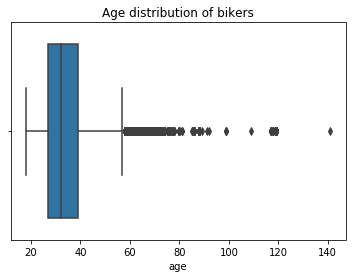

In [16]:
sb.boxplot(data = df, x='age')
plt.title('Age distribution of bikers')
plt.show()

### Observations
- Data with members older than 60 can be considered as outlier
- The minimum age 18, maybe only adults are allowed to do take the bikes

In [17]:
#Removing data from users above 60
df = df[df.age <= 60]
df.shape

(171617, 15)

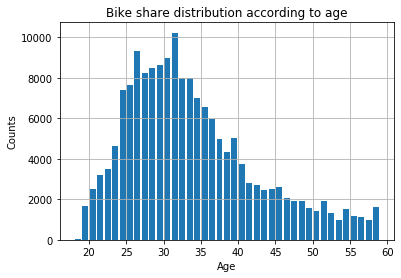

In [18]:
age_bins = np.arange(18, 60, 1)
plt.hist(data=df, x='age', bins=age_bins, rwidth=0.8)
plt.title('Bike share distribution according to age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid()

- Most bikers are between 25 and 35 years old

### Question: When are bikes used the most during the week?
### Visualization

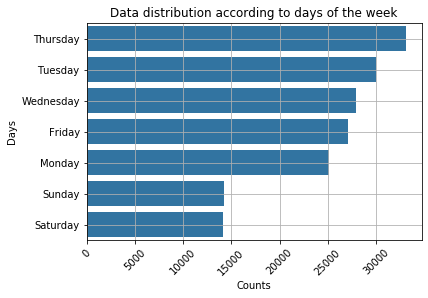

In [19]:
color = sb.color_palette()[0]
sb.countplot(data=df, y=df.week_day, color=color, order=df.week_day.value_counts().index)
plt.title('Data distribution according to days of the week')
plt.xlabel('Counts')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.grid()

### Observations
- Bikes are most used on Thursdays
- Bikes are not used much during the weekend

### Question: At what time are the bikes used the most during the day?
### Visualization

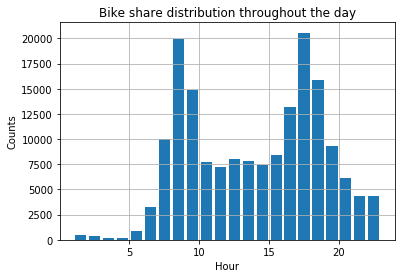

In [20]:
time_bins = np.arange(1, 24, 1)
plt.hist(data=df, x='time_of_day', color=color, bins=time_bins, rwidth=0.8)
plt.title('Bike share distribution throughout the day')
plt.xlabel('Hour')
plt.ylabel('Counts')
plt.grid()

### Observations
- Bikes are most used either in the morning or during the end of the day

### Question: How long are the bikes usually taken?
### Visualization

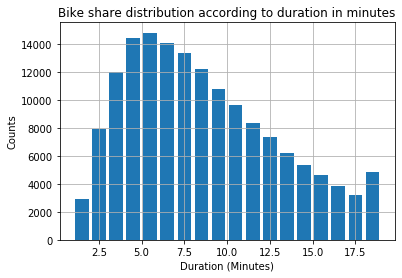

In [21]:
duration_bins = np.arange(df.duration_min.min(), 20, 1)
plt.hist(data=df, x='duration_min', color=color, bins=duration_bins, rwidth=0.8)
plt.title('Bike share distribution according to duration in minutes')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Counts')
plt.grid()

### Observations
- Most rides are less than 10 minutes

### Question: How does genders compare?
### Visualization

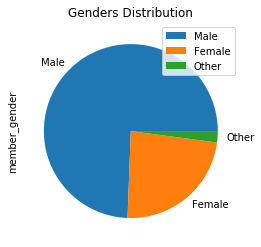

In [22]:
df.member_gender.value_counts().plot.pie()
plt.title("Genders Distribution")
plt.legend();

### Observations
- Most riders are men

### Question: How does subscribers count compare to customers count?
### Visualization

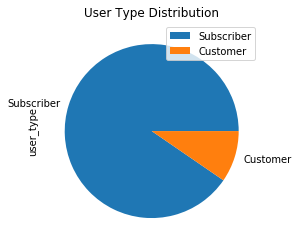

In [23]:
df.user_type.value_counts().plot.pie()
plt.title("User Type Distribution")
plt.legend();

### Observations
- There's a lot more subscribers than customers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We could notice that the users consisted of a lot more subscribers than customers, as for gender, males were dominant, followed by females. There was no cleaning to do concerning these features.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> While investigating the ages I noticed that some records had users older than the oldest human ever recorded. Since almost all the users had less than 60 years old (as showed by the boxplot), I dropped the data with outliers. 

## Bivariate Exploration

### Question: Does age has an influence on wether the user is a subscriber or not?
### Visualization

In [24]:
isSubscriber = df.user_type == 'Subscriber'
isCustomer = df.user_type == 'Customer'

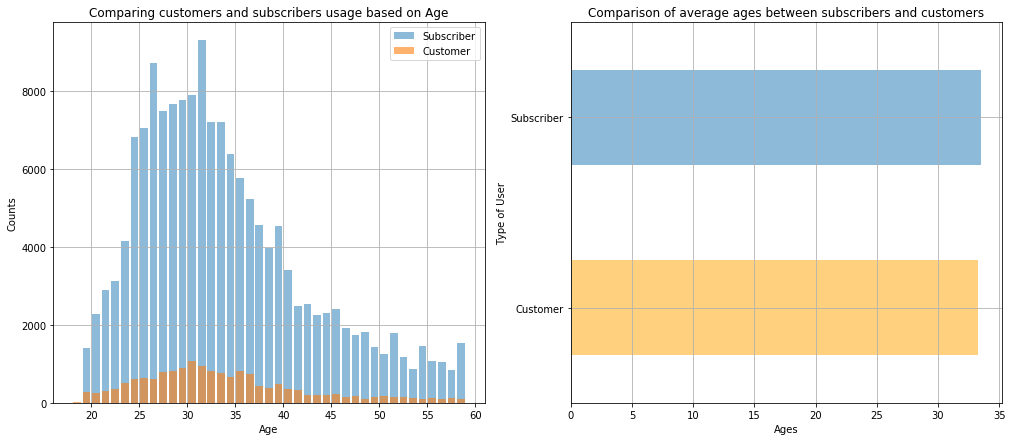

In [25]:
plt.figure(figsize=(17,7))

plt.subplot(1, 2, 1)
df.age[isSubscriber].hist(alpha=0.5, bins=age_bins, label='Subscriber', rwidth=0.8)
df.age[isCustomer].hist(alpha=0.6, bins=age_bins, label='Customer', rwidth=0.8)
plt.title('Comparing customers and subscribers usage based on Age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend();

plt.subplot(1, 2, 2)
df.groupby('user_type')['age'].mean().plot(kind='barh', alpha=0.5, color=['orange', color])
plt.title('Comparison of average ages between subscribers and customers')
plt.ylabel('Type of User')
plt.xlabel('Ages')
plt.grid();

### Observations
- Age doesn't influence the nature of a user (Customer or subscriber)

### Question: Does ride distance has an influence on wether the user is a subscriber or not?
### Visualization

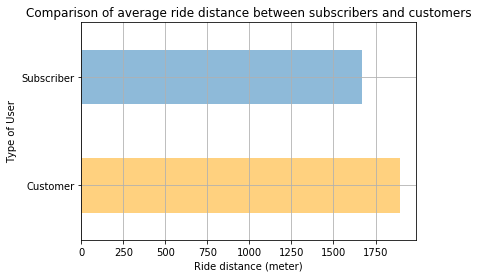

In [26]:
df.groupby('user_type')['distance_in_meter'].mean().plot(kind='barh', alpha=0.5, color=['orange', color])
plt.title('Comparison of average ride distance between subscribers and customers')
plt.ylabel('Type of User')
plt.xlabel('Ride distance (meter)')
plt.grid()

### Observations
- Customers ride on slightly bigger distances than subscribers

### Question: Does ride duration has an influence on wether the user is a subscriber or not?
### Visualization

In [27]:
# Overall Average Trip Duration

print(df.duration_min.mean(), "minutes")

11.23203994942226 minutes


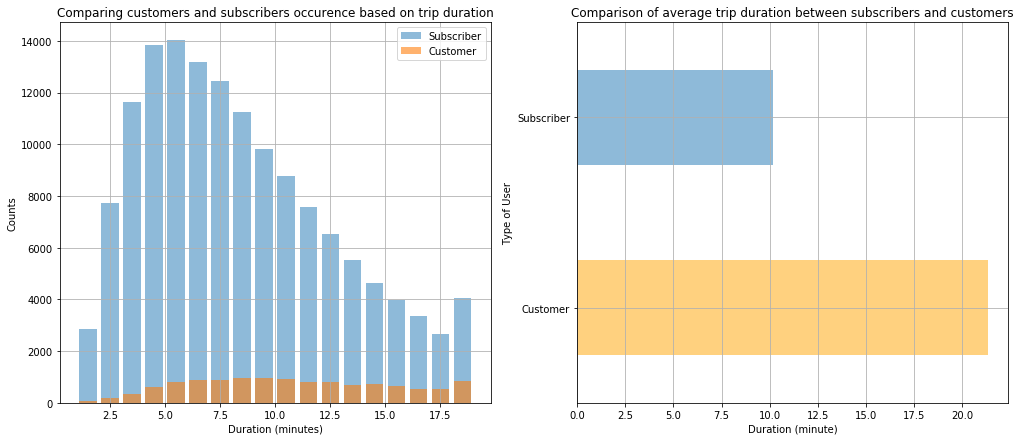

In [28]:
plt.figure(figsize=(17,7))

plt.subplot(1, 2, 1)
df.duration_min[isSubscriber].hist(alpha=0.5, bins=duration_bins, label='Subscriber', rwidth=0.8)
df.duration_min[isCustomer].hist(alpha=0.6, bins=duration_bins, label='Customer', rwidth=0.8)
plt.title('Comparing customers and subscribers occurence based on trip duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Counts')
plt.legend();

plt.subplot(1, 2, 2)
df.groupby('user_type')['duration_min'].mean().plot(kind='barh', alpha=0.5, color=['orange', color])
plt.title('Comparison of average trip duration between subscribers and customers')
plt.ylabel('Type of User')
plt.xlabel('Duration (minute)')
plt.grid()

### Observations
- Subscribers mostly do 5 minute trips
- Customers ride way more longer than subscribers even tho the distances are not that different
- Customers surely want to take their time and enjoy since they are on an averagely <a href="https://divvybikes.com/pricing">a lot more expensive</a> plan as compared to subscribers

### Question: Does the time of day when the trip was taken depends of wether the user is a subscriber or not?
### Visualization

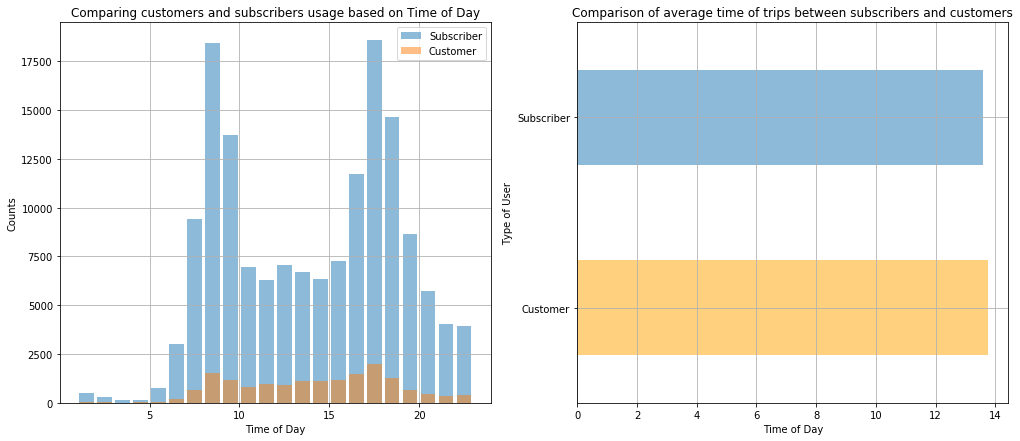

In [29]:
plt.figure(figsize=(17,7))
time_bins = np.arange(1, 24, 1)
plt.subplot(1,2,1)
df.time_of_day[isSubscriber].hist(alpha=0.5, bins=time_bins, rwidth=0.8, label='Subscriber')
df.time_of_day[isCustomer].hist(alpha=0.5, bins=time_bins, rwidth=0.8, label='Customer')
plt.title('Comparing customers and subscribers usage based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Counts')
plt.legend();

plt.subplot(1,2,2)
df.groupby('user_type')['time_of_day'].mean().plot(kind='barh', alpha=0.5, color=['orange', color])
plt.title('Comparison of average time of trips between subscribers and customers')
plt.ylabel('Type of User')
plt.xlabel('Time of Day')
plt.grid();

### Observations
- The likeliness for a user to ride at a certain time is not dependent of wether he is a subscriber or a user

### Question: Is the time of the ride influenced by if it's a bike share or not?
### Visualization

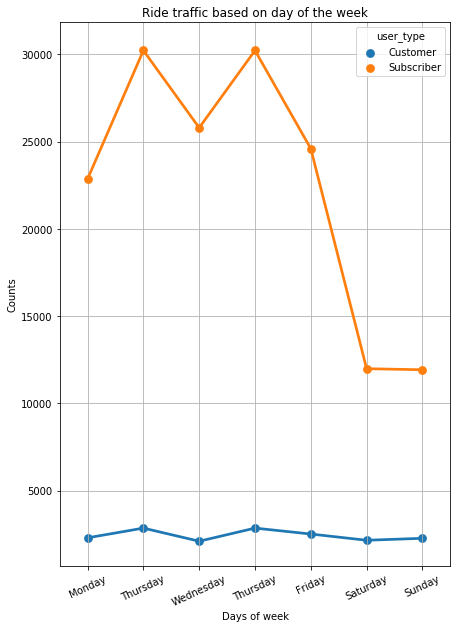

In [30]:

weeks = ['Monday','Thursday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(7,10))
sb.pointplot(data=df.groupby(['week_day', 'user_type']).size().reset_index(), x='week_day', y=0, hue='user_type', order=weeks)
plt.title('Ride traffic based on day of the week')
plt.xlabel('Days of week')
plt.ylabel('Counts')
plt.xticks(rotation=25)
plt.grid()

### Observations
- Customers traffic is not very influenced by the day, but its the contrary for subscribers
- Subscribers are more likely to get a bike during work days (monday to friday), ideally on tuesdays and thursdays

### Question: Does the time of day when the trip was taken depends of wether the user is a male or female?
### Visualization

In [31]:
isMale = df.member_gender == 'Male'
isFemale = df.member_gender == 'Female'
isOther = df.member_gender == 'Other'

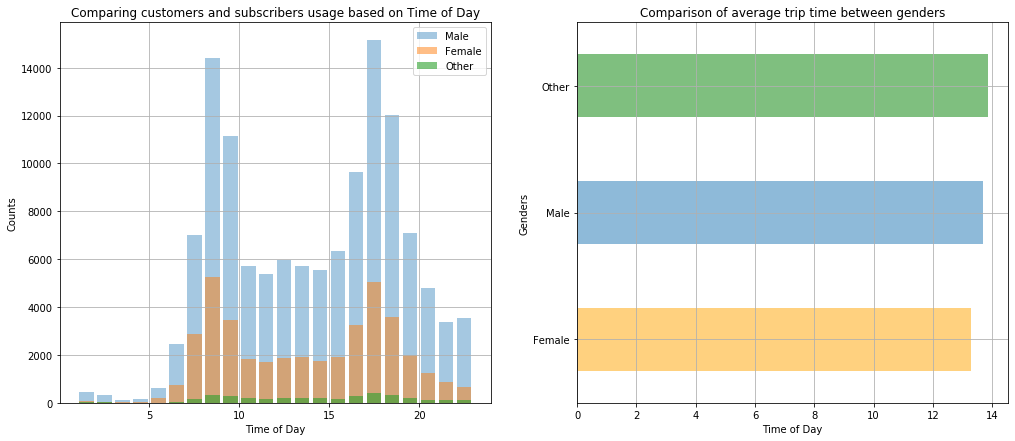

In [32]:
plt.figure(figsize=(17,7))

plt.subplot(1, 2, 1)
df.time_of_day[isMale].hist(alpha=0.4, bins=time_bins, rwidth=0.8, label='Male')
df.time_of_day[isFemale].hist(alpha=0.5, bins=time_bins, rwidth=0.8, label='Female')
df.time_of_day[isOther].hist(alpha=0.6, bins=time_bins, rwidth=0.8, label='Other')
plt.title('Comparing customers and subscribers usage based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Counts')
plt.legend();

plt.subplot(1, 2, 2)
df.groupby('member_gender')['time_of_day'].mean().plot(kind='barh', alpha=0.5, color=['orange', color, 'green'])
plt.title('Comparison of average trip time between genders')
plt.ylabel('Genders')
plt.xlabel('Time of Day')
plt.grid();

### Observations
- The time chosen for the trip doesn't seem to depend on the gender

### Question: Does the distance of the trip depends on wether the user is a male or female?
### Visualization

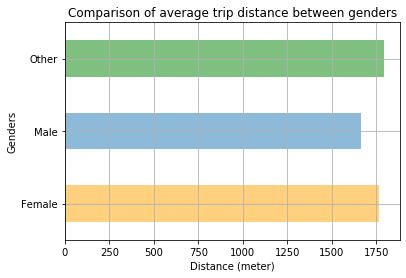

In [33]:
df.groupby('member_gender')['distance_in_meter'].mean().plot(kind='barh', alpha=0.5, color=['orange', color, 'green'])
plt.title('Comparison of average trip distance between genders')
plt.ylabel('Genders')
plt.xlabel('Distance (meter)')
plt.grid()

### Observations
- The distance doesn't seem to depend a lot on the gender

### Question: Does the duration of the trip depends on wether the user is a male or female?
### Visualization

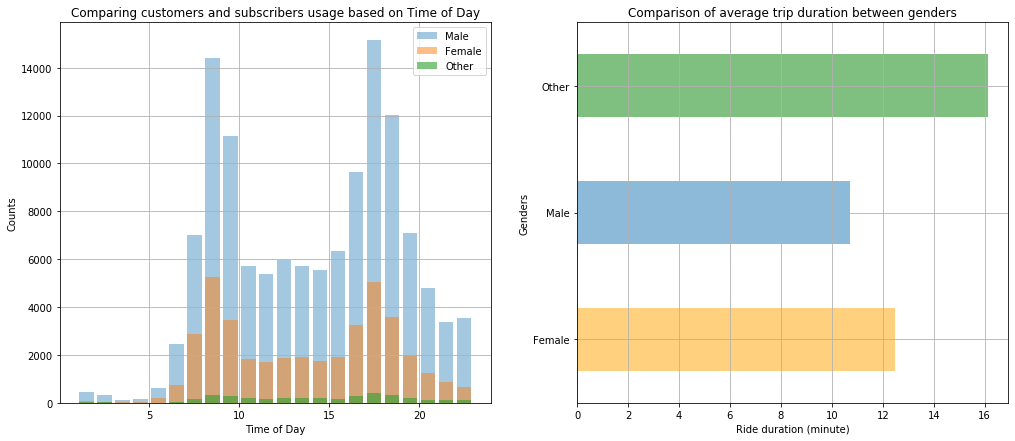

In [34]:
plt.figure(figsize=(17,7))

plt.subplot(1, 2, 1)
df.time_of_day[isMale].hist(alpha=0.4, bins=time_bins, rwidth=0.8, label='Male')
df.time_of_day[isFemale].hist(alpha=0.5, bins=time_bins, rwidth=0.8, label='Female')
df.time_of_day[isOther].hist(alpha=0.6, bins=time_bins, rwidth=0.8, label='Other')
plt.title('Comparing customers and subscribers usage based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Counts')
plt.legend();

plt.subplot(1, 2, 2)
df.groupby('member_gender')['duration_min'].mean().plot(kind='barh', alpha=0.5, color=['orange', color, 'green'])
plt.title('Comparison of average trip duration between genders')
plt.ylabel('Genders')
plt.xlabel('Ride duration (minute)')
plt.grid()

### Observations
- Males ride approximatively 2 minutes less than females
- The Other gender rides the longest

### Question: Does the trip distance depends of wether the user is a male or female?
### Visualization

In [35]:
df.duration_min.mean()

11.23203994942226

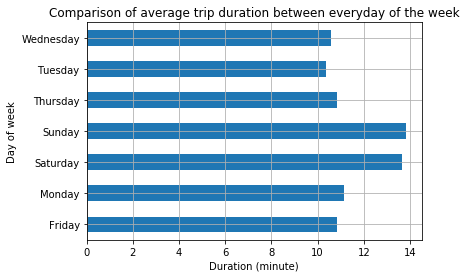

In [36]:
df.groupby('week_day')['duration_min'].mean().plot(kind='barh')
plt.title('Comparison of average trip duration between everyday of the week')
plt.ylabel('Day of week')
plt.xlabel('Duration (minute)')
plt.grid()

### Observations
- Trips are longer during the weekend, probably because there is more free time

In [37]:
isBikeShare = df.bike_share_for_all_trip == 'Yes'
isNotBikeShare = df.bike_share_for_all_trip == 'No'

### Question: Does doing a bike share depend on wether the user is a customer or subscriber ?
### Visualization

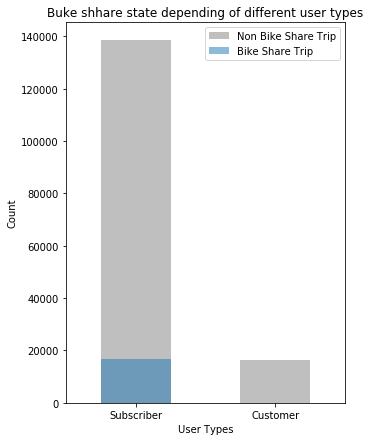

In [38]:

plt.figure(figsize=(5,7))
df.user_type[isNotBikeShare].value_counts().plot(kind='bar', color= 'grey', alpha=0.5, label='Non Bike Share Trip')
df.user_type[isBikeShare].value_counts().plot(kind='bar', color= color, alpha=0.5, label='Bike Share Trip')
plt.title('Buke shhare state depending of different user types')
plt.xlabel('User Types')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.show()

### Observations
- Most users don't do bike shares
- Customers never do bike shares

### Question: Does the gender has an influence on wether the user is a customer or subscriber ?
### Visualization

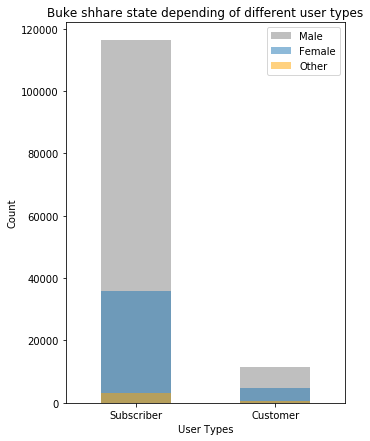

In [39]:
plt.figure(figsize=(5,7))
df.user_type[isMale].value_counts().plot(kind='bar', color= 'grey', alpha=0.5, label='Male')
df.user_type[isFemale].value_counts().plot(kind='bar', color= color, alpha=0.5, label='Female')
df.user_type[isOther].value_counts().plot(kind='bar', color= 'orange', alpha=0.5, label='Other')
plt.title('Buke shhare state depending of different user types')
plt.xlabel('User Types')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()
plt.show()

- Since the plot doesn't give much information about the influence of gender on user type, we can write a function to help our understanding

In [40]:
def getSubscriptionStatusRatioBasedOnVariable(variable, firstLabel, oppositeLabel, firstValue, oppositeValue):
   firstLabelIsSubscriber = df[variable][isSubscriber].value_counts()[firstValue]
   firstLabelIsCustomer = df[variable][isCustomer].value_counts()[firstValue]
   oppositeLabelIsSubscriber = df[variable][isSubscriber].value_counts()[oppositeValue]
   oppositeLabelIsCustomer = df[variable][isCustomer].value_counts()[oppositeValue]
   subscribers = len(df[isSubscriber])
   customers = len(df[isCustomer])
   print("Likeliness of any user being a Subscriber: ", (subscribers/(customers+subscribers))*100, "%")
   print("Likeliness of a", firstLabel, "user being a Subscriber: ", (firstLabelIsSubscriber/(firstLabelIsCustomer+firstLabelIsSubscriber))*100, "%")
   print("Likeliness of a", oppositeLabel ,"user being a Subscriber: ", (oppositeLabelIsSubscriber/(oppositeLabelIsSubscriber+oppositeLabelIsCustomer))*100, "%") 

In [41]:
getSubscriptionStatusRatioBasedOnVariable('member_gender', 'Male', 'Female', 'Male', 'Female')

Likeliness of any user being a Subscriber:  90.42227751329996 %
Likeliness of a Male user being a Subscriber:  91.06218326793085 %
Likeliness of a Female user being a Subscriber:  88.62532222883205 %


### Observations
- Males are **2.5%** more likely to be subscribers. Since this percentage is neglectable we can assume there's not necessarily a dependance between user type and gender (our two main features)

### Question: Is the time of the ride influenced by if it's a bike share or not?
### Visualization

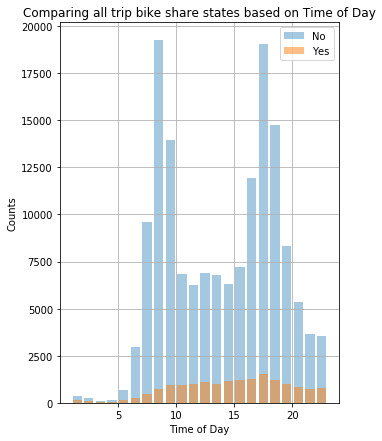

In [42]:
plt.figure(figsize=(5,7))
time_bins = np.arange(1, 24, 1)
df.time_of_day[isNotBikeShare].hist(alpha=0.4, bins=time_bins, rwidth=0.8, label='No')
df.time_of_day[isBikeShare].hist(alpha=0.5, bins=time_bins, rwidth=0.8, label='Yes')
plt.title('Comparing all trip bike share states based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Counts')
plt.legend();

### Observations
- Bike shares are less done during the morning
- They are preferred during the afternoon, before evening

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We could see that being a customer or a subscriber was not related to the age, the time of the trip was also the same on average for each type of user. Features that were influenced by the user type are the distance covered (slightly larger for customers), the trip duration (More than two times larger for customers) and the day of the week variable which showed that customers traffic was not too influenced by the day meanwhile subscribers traffic could change drastically dependent of the same variable

> Also, as for the gender, we could notice that males had slightly smaller trips compared to females and the time of the trip wasn't linked to wether the user is male or female. Also we could add that user type was not dependent on gender.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Studying other features, we could draw out some interesting insights: Trips lasted longer during weekends, customers never ever did all trip bike shares, all trip bike shares where not done a lot during the morning as compared to normal trips.

## Multivariate Exploration

### Question: Is the duration of the ride influenced by wether the user is a subscriber or not?
### Visualization

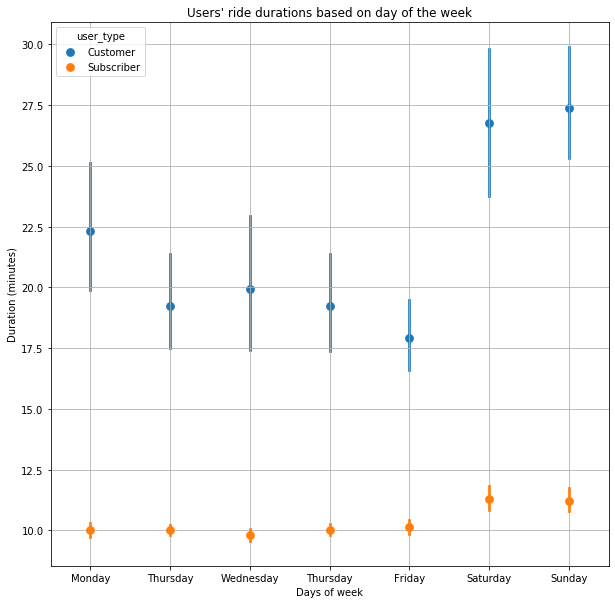

In [43]:
plt.figure(figsize=(10,10))
sb.pointplot(data=df, x='week_day', y='duration_min', hue='user_type', linestyles='', order=weeks)
plt.title('Users\' ride durations based on day of the week')
plt.xlabel('Days of week')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=0)
plt.grid()

### Observations
- Customers trip duration is almost constant througout working days but increases slightly during the weekend
- Subscribers trip duration decreases throughout the working days but increases a lot during the weekend

### Question: Is the time of the ride influenced by if it's a bike share or not?
### Visualization

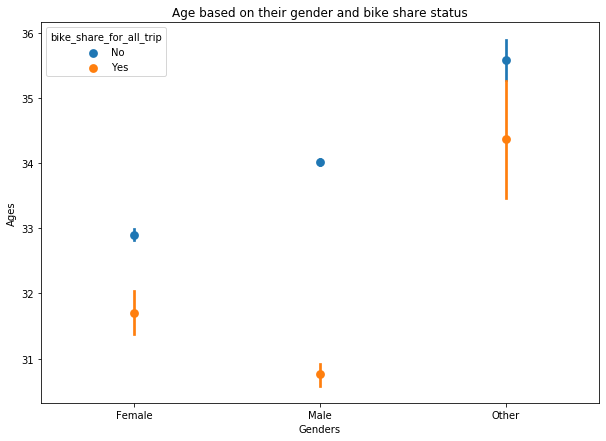

In [44]:
plt.figure(figsize=(10,7))
sb.pointplot(data=df, x='member_gender', y='age', hue='bike_share_for_all_trip', linestyles='')
plt.title('Age based on their gender and bike share status')
plt.xlabel('Genders')
plt.ylabel('Ages')
plt.show()

### Observations
- Overall, older people do less bike share
- It is far more noticeable with males

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> First we studied a probable relationship between trip duration, user type and week day. We could see that subscribers had very consistent ride durations during business days (Monday to Friday) while customers duration would variate a lot. However, both of them would ride for longer periods of time during weekend, especially for customers as the difference were a lot more noticeable for them. 
> We also looked into the relation ship between gender, age, all trip bike shares. The most marking insight was that older people would prefer not to do all trip bike shares, especially males.

### Were there any interesting or surprising interactions between features?

> The most surprising fact was about subscribers choosing to do on average 10 minutes rides during business days in a noticeably consistent way.

## Conclusions
>This study was about analysing a dataset including information about individual rides made in a bike-sharing system in San Francisco. We started by doing some preliminary wrangling to make the dataset more useable. New variables were engineered while others were removed, some other variables were modified to have more appropriate datatypes or units. Then we pursued with the exploration which were divised into 3 main components: the unvariate exploration, the bivariate exploration and finally the multi-variate exploration. To sum up, during the first part we could see that the smaller numbers of trips were registered during weekends and that subscribers and male users were a lot more represented. In the second part, we could notice that customer users had more than two times longer rides than subscribers and that females had slightly longer rides than males. Finally on the third part, we noted that even tho most people didn't ride on weekends, it was the period with longest ride durations.
